In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = "../sum_data-0.csv"
data = pd.read_csv(data_path)
# Show the first 5 rows of the dataframe.
data.head()

,data,label
0,job posting - apple-iss research center conten...,0.0
1,"lang classification grimes , joseph e . and b...",0.0
2,query : letter frequencies for text identifica...,0.0
3,risk a colleague and i are researching the dif...,0.0
4,request book information earlier this morning ...,0.0


In [3]:
# Drop rows with NaN values in 'data' column and convert all entries to strings
data.dropna(subset=['data'], inplace=True)
data['data'] = data['data'].astype(str)

In [4]:
#  Tokenization and sequence conversion
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')

# Fit the tokenizer on the data
tokenizer.fit_on_texts(data['data'])

# Convert the text to sequences
sequences = tokenizer.texts_to_sequences(data['data'])

print(sequences[:10])
padded_sequences  = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post')
print(padded_sequences[:10])

[[901, 1337, 4227, 1, 90, 537, 582, 607, 1, 4227, 1, 90, 537, 7, 102, 57, 729, 2365, 1, 147, 4227, 179, 807, 4, 2, 268, 3, 161, 200, 3, 2, 436, 24, 3, 1442, 1864, 6, 1442, 9, 646, 8, 7, 2845, 137, 1, 2, 1102, 2119, 21, 29, 90, 3120, 6, 288, 37, 198, 272, 23, 262, 4, 58, 4, 499, 1732, 23, 2097, 280, 3, 185, 3, 2, 1213, 517, 178, 273, 1, 23, 734, 1, 23, 734, 4, 248, 3, 137, 23, 734, 17, 568, 7, 160, 5, 137, 609, 1, 2, 1102, 2119, 21, 29, 90, 3120, 3120, 6, 116, 18, 52, 3, 2, 133, 409, 288, 37, 198, 272, 23, 941, 287, 1155, 1065, 4, 1732, 23, 2097, 160, 1, 4, 1, 1517, 174, 1883, 280, 3, 2, 284, 171, 4, 247, 3, 499, 9, 568, 280, 3, 2561, 823, 4, 18, 137, 2450, 262, 9, 3026, 209, 1836, 21, 29, 7, 1481, 20, 26, 347, 44, 5, 86, 302, 3, 669, 109, 404, 18, 7, 692, 1, 1001, 20, 26, 347, 73, 5, 201, 302, 3, 1, 32, 163, 1338, 250, 1045, 1755, 198, 1065, 4, 2176, 4, 1, 17, 568, 6, 95, 1372, 280, 3, 131, 131, 4, 2588, 17, 1279, 7, 2588, 131, 1, 34, 17, 646, 8, 33, 4334, 2588, 131, 1, 1649, 20, 354, 

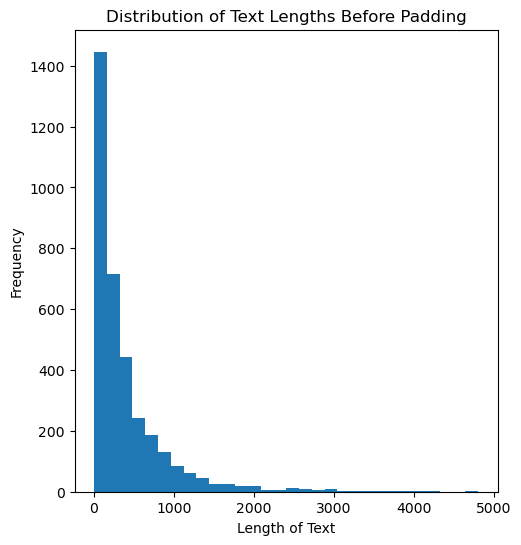

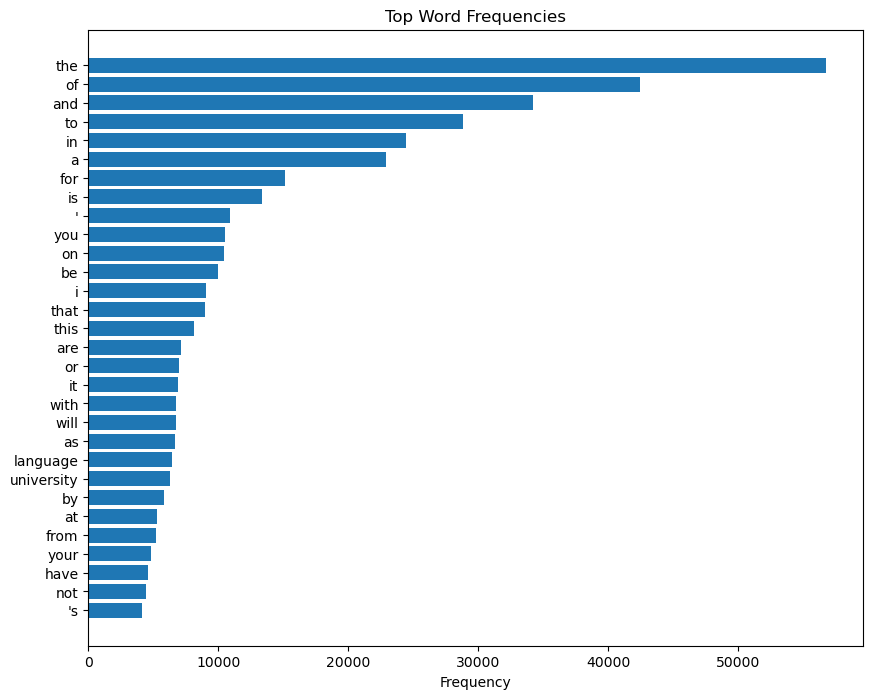

In [5]:
# Calculate text lengths
text_lengths = [len(x) for x in sequences]

# Plotting the distribution of text lengths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(text_lengths, bins=30)
plt.title('Distribution of Text Lengths Before Padding')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')

# Extract word frequency
word_counts = tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Get top N words to plot
top_words = sorted_word_counts[:30]  # adjust N to your preference
words = [w[0] for w in top_words]
frequencies = [w[1] for w in top_words]

# Plotting word frequency
plt.figure(figsize=(10, 8))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.title('Top Word Frequencies')
plt.gca().invert_yaxis()  # invert y-axis to have the highest frequencies on top
plt.show()


In [6]:
# Model definition

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16, input_length=padded_sequences.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)

# Model training
history = model.fit(X_train, y_train, epochs=30, batch_size=16 ,validation_data=(X_test, y_test))

Epoch 1/30
176/176 [==============================] - 5s 19ms/step - loss: 0.6449 - accuracy: 0.6793 - val_loss: 0.6077 - val_accuracy: 0.7031
Epoch 2/30
176/176 [==============================] - 2s 13ms/step - loss: 0.6177 - accuracy: 0.6801 - val_loss: 0.5968 - val_accuracy: 0.7031
Epoch 3/30
176/176 [==============================] - 2s 13ms/step - loss: 0.5980 - accuracy: 0.6801 - val_loss: 0.5693 - val_accuracy: 0.7031
Epoch 4/30
176/176 [==============================] - 2s 13ms/step - loss: 0.5489 - accuracy: 0.6801 - val_loss: 0.5071 - val_accuracy: 0.7031
Epoch 5/30
176/176 [==============================] - 2s 13ms/step - loss: 0.4602 - accuracy: 0.7515 - val_loss: 0.4117 - val_accuracy: 0.7401
Epoch 6/30
176/176 [==============================] - 2s 13ms/step - loss: 0.3687 - accuracy: 0.9079 - val_loss: 0.3378 - val_accuracy: 0.9503
Epoch 7/30
176/176 [==============================] - 2s 13ms/step - loss: 0.2979 - accuracy: 0.9346 - val_loss: 0.2939 - val_accuracy: 0.8764

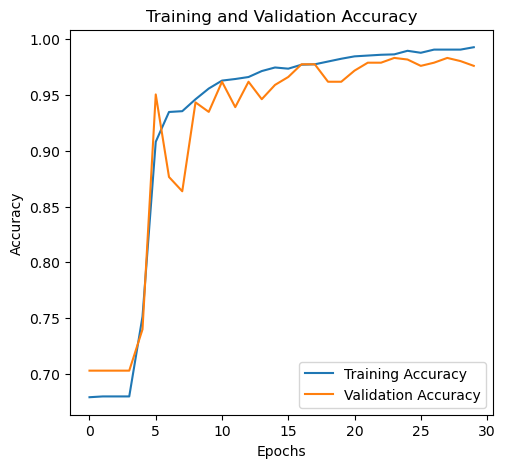

In [8]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

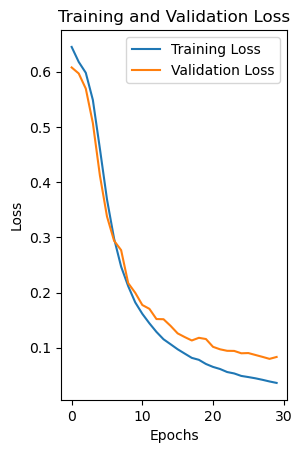

In [9]:
# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

22/22 [==============================] - 0s 8ms/step - loss: 0.0833 - accuracy: 0.9759
Test Accuracy: 97.59%


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer matrix visualization

22/22 [==============================] - 0s 7ms/step


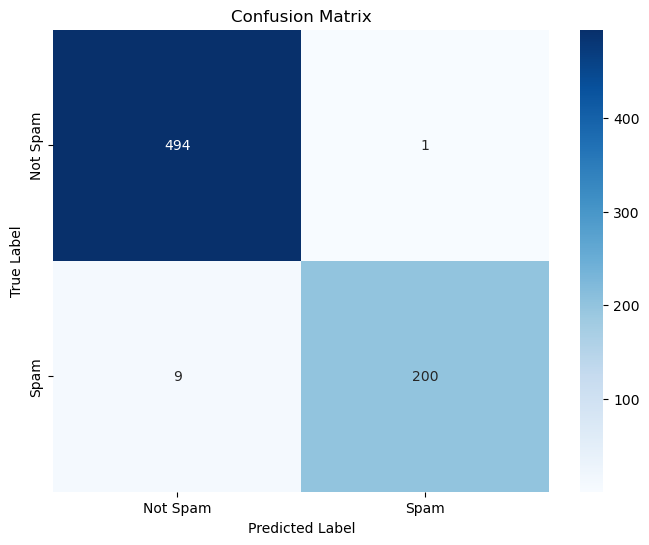

In [12]:
# Predict the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.85).astype(int)  # Convert probabilities to binary output

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Save the model
model.save('model_dnn.h5')  # Saves to HDF5 file

# Save the tokenizer
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

In [14]:
from tensorflow.keras.models import load_model

In [15]:
load_model = load_model('model_dnn.h5')

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Restored model accuracy: {accuracy*100:.2f}%")
# Making predictions
predictions = model.predict(X_test)

22/22 [==============================] - 0s 9ms/step - loss: 0.0833 - accuracy: 0.9759
Restored model accuracy: 97.59%
22/22 [==============================] - 0s 8ms/step


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
# Example text
text_not_spam = "Hey! How are you doing. Let's catch up soon!"

text_spam = "Congratulations! You've been selected as a winner. Text WON to 44255 to claim your prize."

# Tokenize the text
sequence = tokenizer.texts_to_sequences([text_not_spam])

# Pad the sequence
padded_sequence = pad_sequences(sequence, maxlen=padded_sequences.shape[1], padding='post')

# Predict using the model
prediction = model.predict(padded_sequence)
print("Prediction:", prediction)

# You can add a threshold to classify the prediction as 'spam' or 'not spam'
is_spam = prediction[0][0] > 0.85  # Assuming sigmoid output, change threshold as needed
print("Is the message spam?:", "Yes" if is_spam else "No")

1/1 [==============================] - 0s 90ms/step
Prediction: [[0.913661]]
Is the message spam?: Yes
